# Clustering

In this notebook we will study about **K-Means** algorithm but first we will start with **Loading Data**. Before exploring data, let us have a look at the data dictionary

Following is the Data Dictionary for Credit Card dataset :-

**CUST_ID** : Identification of Credit Card holder (Categorical) <br/>
**BALANCE** : Balance amount left in their account to make purchases <br/>
**PURCHASES** : Amount of purchases made from account <br/>
**INSTALLMENTS_PURCHASES** : Amount of purchase done in installment <br/>
**CASH_ADVANCE** : Cash in advance given by the user <br/>
**CREDIT_LIMIT** : Limit of Credit Card for user <br/>
**PAYMENTS** : Amount of Payment done by user <br/>
**MINIMUM_PAYMENTS** : Minimum amount of payments made by user <br/>
**TENURE** : Tenure of credit card service for user

## Loading Data

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 
%matplotlib inline 

**Task 1:** Read CSV file "credit_card.csv" from system and It is imporatant to make a copy of data first.

In [2]:
# write code here
data = pd.read_csv('credit_card.csv')
df = data.copy()

**Task 2:** Get the shape of data

In [3]:
#write code here
df.shape

(8950, 9)

**Task 3:** Display first five rows

In [4]:
#write code here
df.head()

,CUST_ID,BALANCE,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,TENURE
0,C10001,40.900749,95.40,95.4,0.000000,1000.0,201.802084,139.509787,12
1,C10002,3202.467416,0.00,0.0,6442.945483,7000.0,4103.032597,1072.340217,12
2,C10003,2495.148862,773.17,0.0,0.000000,7500.0,622.066742,627.284787,12
3,C10004,1666.670542,1499.00,0.0,205.788017,7500.0,0.000000,312.343947,12
4,C10005,817.714335,16.00,0.0,0.000000,1200.0,678.334763,244.791237,12


**Task 4:** Display data types of Data

In [5]:
#write code here
df.dtypes

CUST_ID                    object
BALANCE                   float64
PURCHASES                 float64
INSTALLMENTS_PURCHASES    float64
CASH_ADVANCE              float64
CREDIT_LIMIT              float64
PAYMENTS                  float64
MINIMUM_PAYMENTS          float64
TENURE                      int64
dtype: object

**Task 5:** Check missing values

In [6]:
#write code here
df.isnull().sum()

CUST_ID                   0
BALANCE                   0
PURCHASES                 0
INSTALLMENTS_PURCHASES    0
CASH_ADVANCE              0
CREDIT_LIMIT              0
PAYMENTS                  0
MINIMUM_PAYMENTS          0
TENURE                    0
dtype: int64

**Task 6:** Check the statistics

In [7]:
# write code here
df.describe()

,BALANCE,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,1003.204834,411.067645,978.871112,4494.282473,1733.143852,844.906767,11.517318
std,2081.531879,2136.634782,904.338115,2097.163877,3638.646702,2895.063757,2332.792322,1.338331
min,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,6.000000
25%,128.281915,39.635000,0.000000,0.000000,1600.000000,383.276166,170.857654,12.000000
50%,873.385231,361.280000,89.000000,0.000000,3000.000000,856.901546,312.343947,12.000000
75%,2054.140036,1110.130000,468.637500,1113.821139,6500.000000,1901.134317,788.713501,12.000000
max,19043.138560,49039.570000,22500.000000,47137.211760,30000.000000,50721.483360,76406.207520,12.000000


**Task 7:** Remove **CUST_ID**

In [8]:
X=df.drop('CUST_ID',axis=1)

In [9]:
X.head()

,BALANCE,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,TENURE
0,40.900749,95.40,95.4,0.000000,1000.0,201.802084,139.509787,12
1,3202.467416,0.00,0.0,6442.945483,7000.0,4103.032597,1072.340217,12
2,2495.148862,773.17,0.0,0.000000,7500.0,622.066742,627.284787,12
3,1666.670542,1499.00,0.0,205.788017,7500.0,0.000000,312.343947,12
4,817.714335,16.00,0.0,0.000000,1200.0,678.334763,244.791237,12


# KMeans

K-means clustering is a type of unsupervised learning, which is used when you have unlabeled data (i.e., data without defined categories or groups). The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable K. The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on feature similarity. The results of the K-means clustering algorithm are:
<br><br>
<li>The centroids of the K clusters, which can be used to label new data</li>
<li>Labels for the training data (each data point is assigned to a single cluster)</li><br>
Rather than defining groups before looking at the data, clustering allows you to find and analyze the groups that have formed organically. The "Choosing K" section below describes how the number of groups can be determined.  

Each centroid of a cluster is a collection of feature values which define the resulting groups. Examining the centroid feature weights can be used to qualitatively interpret what kind of group each cluster represents. 

In [10]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

Kmean.fit command runs the Kmean algorithm on the provided dataset.

Now lets make a copy of df in a new variable ***pred***.
To get to know that which observation belongs to which cluster, there is an attribute ***labels_***. This will return the list of labels and assign it to the new column ***kmean1***

In [11]:
pred = X.copy()
pred['kmean1'] = kmeans.labels_
pred.head()

,BALANCE,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,TENURE,kmean1
0,40.900749,95.40,95.4,0.000000,1000.0,201.802084,139.509787,12,0
1,3202.467416,0.00,0.0,6442.945483,7000.0,4103.032597,1072.340217,12,1
2,2495.148862,773.17,0.0,0.000000,7500.0,622.066742,627.284787,12,4
3,1666.670542,1499.00,0.0,205.788017,7500.0,0.000000,312.343947,12,4
4,817.714335,16.00,0.0,0.000000,1200.0,678.334763,244.791237,12,0


The **kmean1** column shows the lables of the Kmean algorithm. For example row index 0 belongs to cluster 0 and row 1 belongs to cluster 1 and row 2 belongs to cluster 4 and so on

In [12]:
pred['kmean1'].value_counts()

0    5422
4    2480
1     885
2     107
3      56
Name: kmean1, dtype: int64

The above output shows the number of obervations in each cluster

# Scaling

#### Why need scaling?
<br>Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions will not work properly without normalization.

### Scaling using min max

Also known as min-max scaling or min-max normalization, is the simplest method and consists in rescaling the range of features to scale the range in [0, 1]. Selecting the target range depends on the nature of the data. The general formula is given as:
<br>

*Formula*
<br>zi=(xi−min(x))/(max(x)−min(x))

### Scaling using MinMaxScaler function

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler() 

In [15]:
new = scaler.fit_transform(X)

C:\Users\Chaudhry_M_Huzaifa\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [16]:
type(new)

numpy.ndarray

In [17]:
new

array([[2.14779454e-03, 1.94536779e-03, 4.24000000e-03, ...,
        3.97863135e-03, 1.82564563e-03, 1.00000000e+00],
       [1.68169097e-01, 0.00000000e+00, 0.00000000e+00, ...,
        8.08933873e-02, 1.40344791e-02, 1.00000000e+00],
       [1.31026136e-01, 1.57662475e-02, 0.00000000e+00, ...,
        1.22643641e-02, 8.20961806e-03, 1.00000000e+00],
       ...,
       [1.22871936e-03, 2.94456089e-03, 6.41777778e-03, ...,
        1.60229492e-03, 1.07843629e-03, 0.00000000e+00],
       [7.06688341e-04, 0.00000000e+00, 0.00000000e+00, ...,
        1.03604933e-03, 7.29475795e-04, 0.00000000e+00],
       [1.95717777e-02, 2.22932216e-02, 0.00000000e+00, ...,
        1.24533826e-03, 1.15527021e-03, 0.00000000e+00]])

In the above step the scaling is done by the built in min max scaler function

In [18]:
col_names = ["BALANCE", "PURCHASES", "INSTALLMENTS_PURCHASES",
             "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS", "TENURE"]

In [19]:
scaled = pd.DataFrame(columns=col_names, data=new)

In [20]:
scaled.head()

,BALANCE,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,TENURE
0,0.002148,0.001945,0.00424,0.000000,0.031720,0.003979,0.001826,1.0
1,0.168169,0.000000,0.00000,0.136685,0.232053,0.080893,0.014034,1.0
2,0.131026,0.015766,0.00000,0.000000,0.248748,0.012264,0.008210,1.0
3,0.087521,0.030567,0.00000,0.004366,0.248748,0.000000,0.004088,1.0
4,0.042940,0.000326,0.00000,0.000000,0.038397,0.013374,0.003204,1.0


Now we will use the scaled variables and see how our clusters differ

**Task 8:** Apply ***fit*** on **scaled** dataset and put the labels in the predicted data.

Also display value count

In [21]:
#Write code here
kmean2 = KMeans(n_clusters=5, random_state=0)
kmean2.fit(scaled)
pred['kmean2'] = kmean2.labels_
pred.head()

,BALANCE,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,TENURE,kmean1,kmean2
0,40.900749,95.40,95.4,0.000000,1000.0,201.802084,139.509787,12,0,0
1,3202.467416,0.00,0.0,6442.945483,7000.0,4103.032597,1072.340217,12,1,4
2,2495.148862,773.17,0.0,0.000000,7500.0,622.066742,627.284787,12,4,4
3,1666.670542,1499.00,0.0,205.788017,7500.0,0.000000,312.343947,12,4,4
4,817.714335,16.00,0.0,0.000000,1200.0,678.334763,244.791237,12,0,0


In [22]:
# Write code here
pred['kmean2'].value_counts()

0    4989
4    2136
2     834
1     589
3     402
Name: kmean2, dtype: int64

From the above output you can see that now the distribution of the clusters has changed

## Choosing K

### Elbow Analysis

The Elbow method is a method of interpretation and validation of consistency within cluster analysis designed to help finding the appropriate number of clusters in a dataset.

### Working

One method to validate the number of clusters is the elbow method. The idea of the elbow method is to run k-means clustering on the dataset for a range of values of k (say, k from 1 to 10 in the examples above), and for each value of k calculate the sum of squared errors (SSE).Then, plot a line chart of the SSE for each value of k. If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best. The idea is that we want a small SSE, but that the SSE tends to decrease toward 0 as we increase k (the SSE is 0 when k is equal to the number of data points in the dataset, because then each data point is its own cluster, and there is no error between it and the center of its cluster). So our goal is to choose a small value of k that still has a low SSE, and the elbow usually represents where we start to have diminishing returns by increasing k

In [23]:
cost = []
for k in range(1, 15):
    kmeanModel = KMeans(n_clusters=k, random_state=0).fit(scaled)
    cost.append([k, kmeanModel.inertia_])

In [24]:
cost

[[1, 770.908301072291],
 [2, 382.4408862069763],
 [3, 259.84673946852934],
 [4, 221.90767147986122],
 [5, 187.9289588894239],
 [6, 167.67335836215],
 [7, 153.17768677937988],
 [8, 141.24593115340468],
 [9, 129.69193811654472],
 [10, 122.88292614104941],
 [11, 117.03890151968645],
 [12, 112.37818112168998],
 [13, 107.64082535547885],
 [14, 103.41868504454229]]

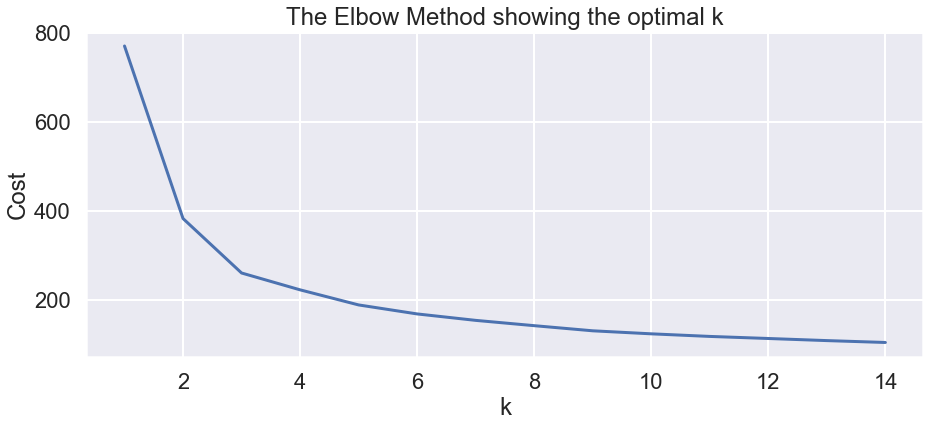

In [25]:
plt.figure(figsize=(15,6))
sns.set_context('poster')
plt.plot(pd.DataFrame(cost)[0], pd.DataFrame(cost)[1])
plt.xlabel('k')
plt.ylabel('Cost')
plt.title('The Elbow Method showing the optimal k') 
plt.show()

From the above graph we can see that the elbow is formed when the input was 3 clusters.
<br>But before proceding, let us check the **Silhouette Score**

### Silhouette Score

The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of. Note that Silhouette Coefficient is only defined if number of labels is 2 <= n_labels <= n_samples - 1.

In [26]:
from sklearn.metrics import silhouette_score

In [27]:
#add plot
s_score = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(scaled)
    s_score.append([k, silhouette_score(scaled, kmeans.labels_)])

In [28]:
s_score

[[2, 0.6924390439486894],
 [3, 0.5062829141231945],
 [4, 0.3905378421218057],
 [5, 0.40059165986032397],
 [6, 0.4189164180999666],
 [7, 0.421246935670558],
 [8, 0.4250323865602197],
 [9, 0.36989101257457213],
 [10, 0.34448720866766114],
 [11, 0.35868816973131495],
 [12, 0.3177081345947561],
 [13, 0.3343468403471007],
 [14, 0.3130636319172069]]

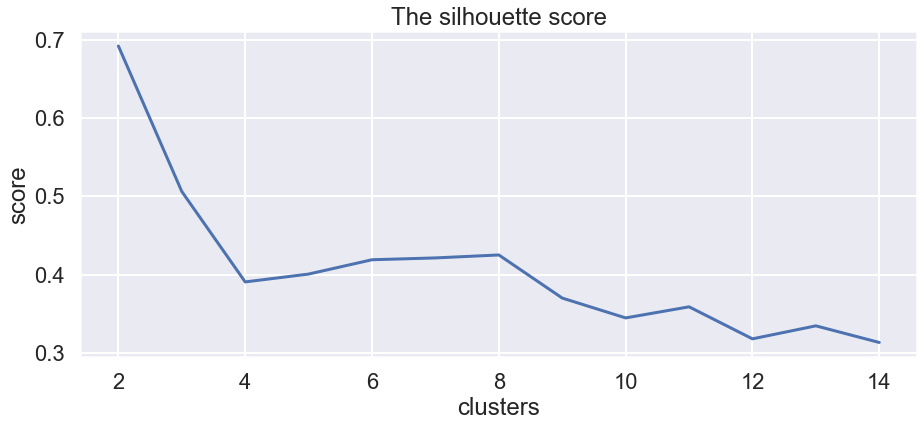

In [29]:
plt.figure(figsize=(15,6))
sns.set_context('poster')
plt.plot( pd.DataFrame(s_score)[0], pd.DataFrame(s_score)[1])
plt.xlabel('clusters')
plt.ylabel('score')
plt.title('The silhouette score') 
plt.show()

## Final clusters using K-Means

After checking the **Elbow Score** and **Silhoute Score**, we can conclude that number of clusters/k should be 3.

**Task 9:** Apply kmeans algorithm with number of clusters = 3. Also assign values to the predicted data and check value count.

In [30]:
#Write code here
kmean3 = KMeans(n_clusters=3, random_state=0)
kmean3.fit(scaled)
pred['kmean3'] = kmean3.labels_
pred['kmean3'].value_counts()

1    6482
2    1704
0     764
Name: kmean3, dtype: int64

## Profiling

**Profiling and its usage**<br>
Having decided (for now) how many clusters to use, we would like to get a better understanding of what values are in those clusters are and interpret them.

Data analytics is used to eventually make decisions, and that is feasible only when we are comfortable (enough) with our understanding of the analytics results, including our ability to clearly interpret them.

To this purpose, one needs to spend time visualizing and understanding the data within each of the selected clusters. For example, one can see how the summary statistics (e.g. averages, standard deviations, etc) of the profiling attributes differ across the segments.

In our case, assuming we decided we use the 3 clusters found using kmean algorithm as outlined above, we can see how the responses changes across clusters. The average values of our data within each cluster are:

In [31]:
p_ = pred[["BALANCE", "PURCHASES","INSTALLMENTS_PURCHASES","CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS","TENURE",'kmean3']]
pivoted = p_.groupby('kmean3')["BALANCE", "PURCHASES","INSTALLMENTS_PURCHASES","CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS","TENURE"].median().reset_index()
pivoted


C:\Users\Chaudhry_M_Huzaifa\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,kmean3,BALANCE,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,TENURE
0,0,486.084834,179.500,0.00,451.892161,1500.0,324.621485,195.124764,7
1,1,559.931306,347.625,95.89,0.000000,2750.0,702.112530,259.333872,12
2,2,4284.321455,754.225,116.75,1431.170759,9000.0,2056.549519,1243.557569,12


# Radar Plot

The radar chart is a chart and/or plot that consists of a sequence of equi-angular spokes, called radii, with each spoke representing one of the variables. The data length of a spoke is proportional to the magnitude of the variable for the data point relative to the maximum magnitude of the variable across all data points. A line is drawn connecting the data values for each spoke. This gives the plot a star-like appearance and the origin of one of the popular names for this plot.

<img src="https://upload.wikimedia.org/wikipedia/commons/0/00/Spider_Chart.svg" />

In [32]:
#!pip install chart_studio

[Sign UP](https://plot.ly/Auth/login/?action=signup#/) on Plotly, verify your email address and regenerate your API key

In [33]:
import chart_studio
chart_studio.tools.set_credentials_file(username='you_username', api_key='API_KEY')

In [34]:
import chart_studio.plotly as py
import plotly.graph_objs as go

In [35]:
radar_data = [
    go.Scatterpolar(
      r = list(pivoted.loc[0,["BALANCE", "PURCHASES","INSTALLMENTS_PURCHASES","CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS","TENURE", 'BALANCE']]),
      theta = ["BALANCE", "PURCHASES","INSTALLMENTS_PURCHASES","CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS","TENURE", 'BALANCE'],
      fill = None,
      fillcolor=None,
      name = 'Cluster 0'
    ),
    go.Scatterpolar(
      r = list(pivoted.loc[1,["BALANCE", "PURCHASES","INSTALLMENTS_PURCHASES","CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS","TENURE", 'BALANCE']]),
      theta = ["BALANCE", "PURCHASES","INSTALLMENTS_PURCHASES","CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS","TENURE", 'BALANCE'],
      fill = None,
      fillcolor=None,
      name = 'Cluster 1'
    ),
    go.Scatterpolar(
      r = list(pivoted.loc[2,["BALANCE", "PURCHASES","INSTALLMENTS_PURCHASES","CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS","TENURE", 'BALANCE']]),
      theta = ["BALANCE", "PURCHASES","INSTALLMENTS_PURCHASES","CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS","TENURE", 'BALANCE'],
      fill = None,
      fillcolor=None,
      name = 'Cluster 2'
    )
]

In [36]:
radar_layout = go.Layout(polar = dict(radialaxis = dict(visible = True,range = [0, 9000])), showlegend = True)

In [38]:
# fig = go.Figure(data=radar_data, layout=radar_layout)
# py.iplot(fig, filename = "radar")